# The Perceptron Learning Algorithm

## Iris Species Binary Classification

In this notebook we implement the *perceptron learning algorithm* for binary species classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

### Task

Our task will be to classify setosa and versicolor species using two feature measures, such as sepal length and sepal width.

In order to do this, I use the following libraries:

* [matplotlib](http://metplotlib.org)
* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [seaborn](https://seaborn.pydata.org/)

The iris data is loaded from [sklearn.dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets).

In [1]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Import datasets from sklearn which contains the iris data
from sklearn import datasets

### Data Exploration

In [2]:
# Load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)


The iris dataset have 150 obeservations with the following variables:
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* target:
    - Iris Setosa (marked as "0")
    - Iris Versicolour (marked as "1")
    - Iris Virginica (marked as "2")

Given sepal width and sepal length, we want to predict "1" or "-1", corresponding to setosa and versicolor, respectively.

And thus, we need to extract the variables we need and convert them to numpy arrays.


In [3]:
# Species to desired label dictionary
label_dict = {iris['target_names'][0] : 1.0, iris['target_names'][1] : -1.0}

# Extract out desired features from iris
X = iris['data'][['sepal length (cm)', 'sepal width (cm)']].iloc[:100]

# Covert features to numpy array, give explanation of the features here!
X = X.to_numpy()

# Extract out labels
y = iris['target'].iloc[:100]

# Convert labels to numpy array
y = y.to_numpy()

# Change labels to match our desired 1 or -1 labels
for i, label in enumerate(y):
    if label == 0.0:
        y[i] = 1.0
    elif label == 1.0:
        y[i] = -1.0

Then we need to build 

$$\bar X^i=\begin{bmatrix}
X^i_1\\ 
\vdots\\ 
X^i_n \\ 
1.0
\end{bmatrix}$$

The bias term ($1.0$) should be added to the previous X array.

In [4]:
# Build the desired X_bar, add ones to the previous X array
X_bar = []
for x in X:
    X_bar.append(np.append(x, np.ones(1)))
X_bar = np.array(X_bar)
X_bar[:5]

array([[5.1, 3.5, 1. ],
       [4.9, 3. , 1. ],
       [4.7, 3.2, 1. ],
       [4.6, 3.1, 1. ],
       [5. , 3.6, 1. ]])

In [5]:
y[0:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [6]:
y[50:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

After exploring the dataset, we found that the first 50 data points are all setosa, while the last 50 data points are versicolor.


---
### Visualization of Data

To have an overall impression of the data, we plot a scatterplot.


Text(0.5, 1.0, 'Iris Data Plot')

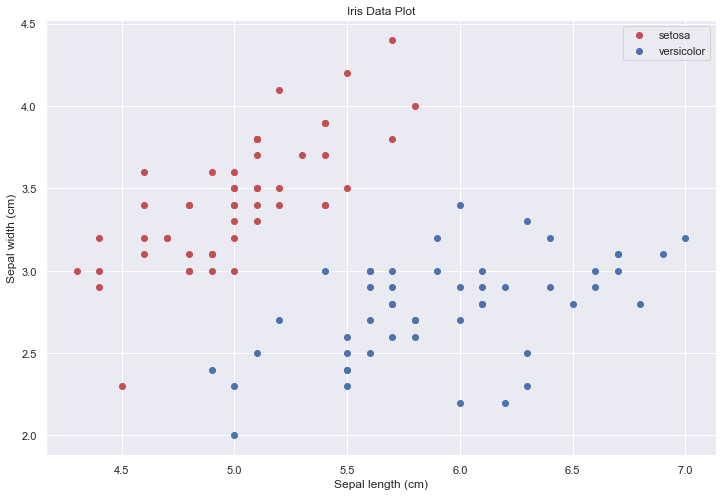

In [7]:
plt.figure(figsize = (12, 8))

# The first 50 data points are setosa
plt.scatter(X_bar[:50, 0],
            X_bar[:50, 1],
            label = 'setosa', 
            color = 'r')

# The last 50 data points are versicolor
plt.scatter(X_bar[50:, 0],
            X_bar[50:, 1], 
            label = 'versicolor', 
            color = 'b')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

From the scatterplot above, the two species are separated well given sepal length and sepal width.

---

### Build the Algorithm

First, to define the activation function. We use sign function as the activation function. 

$$\hat y^i=sign(w^T \bar X^i)=\left\{\begin{matrix}
1, \space\space w^T\bar X^i>0\\ 
-1,\space\space w^T\bar X^i<0
\end{matrix}\right.$$

In [8]:
# Define sign function
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0 :
        return 1.0
    else:
        return -1.0

Secondly, to define the loss function.

$$L(w, \bar X^i)=\frac{1}{2}\sum_{i=1}^n(\hat y^i-y^i)^2 = \frac{1}{2}\sum_{i=1}^n\left (sign(w^T \bar X^i)-y^i\right)^2$$

In [9]:
# Define the loss function
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))    

To define the approximate gradient:


#### The Gradient Approximation Update Rule

For the loss function, we cannot get a derivation of the sign function, and thus, we define an approximation of the gradient.

The **approximate** gradient of the loss function is

$$\triangledown L(w, \bar X^i)=\left (sign(w^T \bar X^i)-y^i\right)\bar X_i$$


In [10]:
# Define the approximate gradient
def grad_approx(w, x, y):
    return (sign(w, x) - y)*x

### Run the algorithm

Set the epochs and the learning rate, and randomly initiate the weights:

In [11]:
# Set epochs
epochs = 1000

# Set the learning rate
alpha = .5

# Randomize intial weights
w = np.random.rand(3)

In [12]:
# Check the loss before implementing
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

The Loss before implementing stochastic approx gradient descent = 100.0


To update the weights,

$$w_{n+1}=w_n - \alpha \triangledown L(w, \bar X^i)$$
where $\alpha$ is the learning rate.

In the meantime, We also calculate the loss for every epoch.


In [13]:
losses = []
for _ in range(epochs):
    for _ in range(70):
        # Randomly pickup an index of sample
        random_index = np.random.randint(100)
        # Update the weights
        w = w - alpha*grad_approx(w, X_bar[random_index], y[random_index])
    # Calculate loss for every epoch
    losses.append(L(w))

Text(0.5, 1.0, 'Loss for Every Epoch')

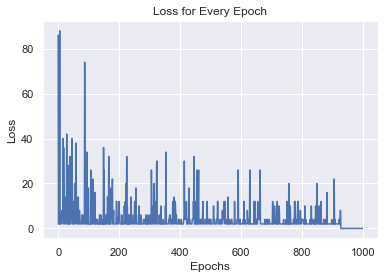

In [14]:
# Plot the loss for every epoch
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for Every Epoch")

From the plot of the loss for every epoch, the loss converge at around 750 epoch.

Finally, we can calculate the linear line to separate the two species regarding to sepal length and sepal width.

Text(0.5, 1.0, 'Iris Data Plot')

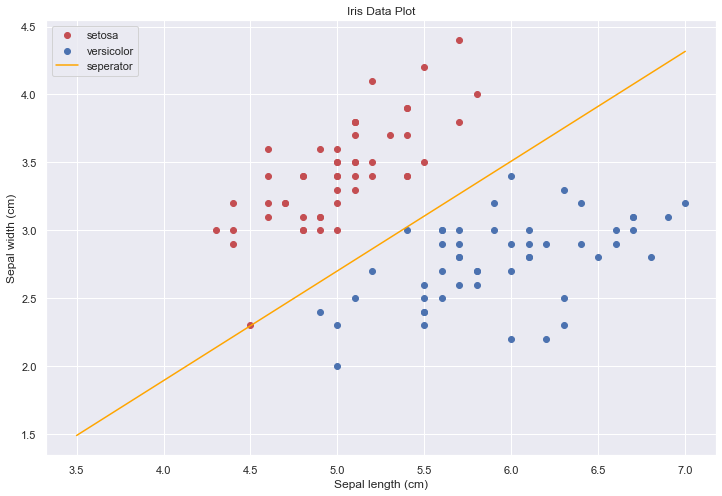

In [15]:
# Define the predicted line
domain = np.arange(3.5, 7.5, .5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]

# The first 50 data points are setosa
plt.figure(figsize = (12, 8))
plt.scatter(X_bar[:50, 0],
            X_bar[:50, 1],
            label = 'setosa', 
            color = 'r')

# The last 50 data points are versicolor
plt.scatter(X_bar[50:, 0],
            X_bar[50:, 1], 
            label = 'versicolor', 
            color = 'b')

# Plot the predicted line
plt.plot(domain,
         line,
         label = 'seperator',
         color = 'orange')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

We can find that the predicted line separate the two sepecies very well, suggesting that our algorithm works well!